In [40]:
#xrs时间列表记录，分辨率不同，需要分开运行

import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
sheet_xrs_time = pd.read_csv('xrs_2010-2016_time.csv')
sheet_lya_time = pd.read_csv('lya_2010-2016_time.csv')
l_index=range(100)
sheet3_x_time = pd.DataFrame()
x_num_list=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
list_year=[]
list_time_end=[]
for i in range(len(sheet_lya_time['DATE'])):
    list_year.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    list_time_end.append(int(sheet_lya_time['PEAKT'][i][0:2])*3600+int(sheet_lya_time['PEAKT'][i][3:5])*60+int(sheet_lya_time['PEAKT'][i][6:8])+3600)

sheet_xrs_time = pd.DataFrame()
k=0
n=0
for  i in list_year:
    try: #处理文件不存在的情况
        print(i)
        if(n<list_year.index('20101019')):#2010年10月19日后的数据是g15
            sheet_xrs_time = pd.read_csv('/home/tzy/curve_data_time/lc'+i+'_xrs_g14.sav_time.csv',header=None)
        else:
            sheet_xrs_time = pd.read_csv('/home/tzy/curve_data_time/lc'+i+'_xrs_g15.sav_time.csv',header=None)
    except:
        print('该项数据文件缺少：',i)
        continue
    m=0
    break_out_flag = False #跳出整个循环的标志    
    b=[]
    a=float(sheet_xrs_time[0][0].split('  ')[1]) #取一个当天最开始时间戳，后面的时间减这个时间得到的就是0时以后的秒数，可以转为时间
    for j in range(len(sheet_xrs_time[0])):
        b=sheet_xrs_time[0][j].split('  ')
        for k in range(1,len(b)): #每个单元格里有5-6个数据，需要依次循环出来，空格分割
            if(len(b[k])>15) or (len(b[k])==0):#数据里的问题，有的是空格，有的是两个数字没分割出来
                sheet3_x_time.loc[m,n]=np.nan
            else:
                sheet3_x_time.loc[m,n]=float(b[k])-a #减掉当天0时的时间戳
            
            if((list_time_end[n]-sheet3_x_time.loc[m,n])<10): #时间数据是按10s单位变的
                
                print('中断:',sheet3_x_time.loc[m,n])
                break_out_flag = True #满足条件，标记为True
                break   #选择在耀斑结束后一小时结束循环
            m=m+1;
        if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
            break
        #print(m)
    n=n+1;
    if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
        x_num_list.append(m)
        print('中断位置已存入列表：',m)
    else:
        x_num_list.append(m-1)
        print('非中断位置：',m-1)

20100409
中断: 21060.0
中断位置已存入列表： 10280
20100609
中断: 35430.0
中断位置已存入列表： 17298
20100731
中断: 23280.0
中断位置已存入列表： 11365
20101019
中断: 51800.0
中断位置已存入列表： 25264
20101023
中断: 66800.0
中断位置已存入列表： 32594
20101026
中断: 15300.0
中断位置已存入列表： 7447
20101110
中断: 63500.0
中断位置已存入列表： 30982
20101116
中断: 14900.0
中断位置已存入列表： 7241
20110104
中断: 38900.0
中断位置已存入列表： 18940
20110126
中断: 83500.0
中断位置已存入列表： 40275
20110211
中断: 81800.0
中断位置已存入列表： 39918
20110212
中断: 42900.0
中断位置已存入列表： 20924
20110325
中断: 14400.0
中断位置已存入列表： 7007
20110329
中断: 5500.0
中断位置已存入列表： 2662
20110331
中断: 81600.0
中断位置已存入列表： 39820
20110501
中断: 39600.0
中断位置已存入列表： 19312
20110616
非中断位置： 42187
20110810
中断: 52500.0
中断位置已存入列表： 25611
20110907
中断: 70100.0
中断位置已存入列表： 34205
20111002
中断: 73000.0
中断位置已存入列表： 35621
20111013
中断: 57200.0
中断位置已存入列表： 27906
20111218
中断: 45700.0
中断位置已存入列表： 22284
20120210
中断: 20300.0
中断位置已存入列表： 9879
20120210
中断: 70300.0
中断位置已存入列表： 34294
20120214
中断: 71900.0
中断位置已存入列表： 35054
20120328
中断: 5100.0
中断位置已存入列表： 2457
20120329
非中断位置： 42172
20120408
中断: 7

In [42]:
sheet3_x_time

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
sheet_xrs_time = pd.read_csv('xrs_2010-2016_time.csv')
sheet_lya_time = pd.read_csv('lya_2010-2016_time.csv')
l_index=range(100)
sheet3_x = pd.DataFrame()

list_year=[]
list_time_end=[]
for i in range(len(sheet_lya_time['DATE'])):
    list_year.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    list_time_end.append(int(sheet_lya_time['PEAKT'][i][0:2])*3600+int(sheet_lya_time['PEAKT'][i][3:5])*60+int(sheet_lya_time['PEAKT'][i][6:8])+3600)

sheet_xrs = pd.DataFrame()
k=0
n=0
for  i in list_year:
    try: #处理文件不存在的情况
        print(i)
        if(n<list_year.index('20101019')):#2010年10月19日后的数据是g15
            sheet_xrs = pd.read_csv('/home/tzy/curve_data/lc'+i+'_xrs_g14.sav_value.csv',header=None)
        else:
            sheet_xrs = pd.read_csv('/home/tzy/curve_data/lc'+i+'_xrs_g15.sav_value.csv',header=None)
    except:
        print('该项数据文件缺少：',i)
        continue
    m=0
    break_out_flag = False #跳出整个循环的标志    
    b=[]
    for j in range(len(sheet_xrs[0])):
        
        if(len(sheet_xrs[0][j].split('  '))>10):#一行数据有多个空格的，得用第二种分割方法
            a=len(sheet_xrs[0][j].split('    '))
            b=sheet_xrs[0][j].split('    ')
        else:
            a=len(sheet_xrs[0][j].split('  '))
            b=sheet_xrs[0][j].split('  ')
                 
                 
        for k in range(1,a): #每个单元格里有5-6个数据，需要依次循环出来，空格分割
            if(len(b[k])>15) or (len(b[k])==0):#数据里的问题，有的是空格，有的是两个数字没分割出来
                sheet3_x.loc[m,n]=0
            else:
                sheet3_x.loc[m,n]=float(b[k]) #
            if(m==x_num_list[n]):
                
                print('中断:',m)
                
                break_out_flag = True
                break   #选择在耀斑结束后一小时结束循环
            m=m+1;
        if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
            break
        #print(m)
    n=n+1;
           

20100409
中断: 10280
20100609
中断: 17298
20100731
中断: 11365
20101019
中断: 25264
20101023
中断: 32594
20101026
中断: 7447
20101110
中断: 30982
20101116
中断: 7241
20110104
中断: 18940
20110126
中断: 40275
20110211
中断: 39918
20110212
中断: 20924
20110325
中断: 7007
20110329
中断: 2662
20110331
中断: 39820
20110501
中断: 19312
20110616
中断: 42187
20110810
中断: 25611
20110907
中断: 34205
20111002
中断: 35621
20111013
中断: 27906
20111218
中断: 22284
20120210
中断: 9879
20120210
中断: 34294
20120214
中断: 35054
20120328
中断: 2457
20120329
中断: 42172
20120408
中断: 34812
20120518
中断: 10272
20120526
中断: 42164
20120528
中断: 22485
20120628
中断: 30189
20120727
中断: 19541
20120802
中断: 28905
20120815
中断: 8321
20120822
中断: 31701
20120823
中断: 11440
20120913
中断: 4172
20120915
中断: 42176
20121010
中断: 21062
20121208
中断: 19842
20121221
中断: 12661
20121231
中断: 40852
20130114
中断: 15291
20130201
中断: 26051
20130205
中断: 12711
20130313
中断: 36206
20130402
中断: 3491
20130404
中断: 24758
20130419
中断: 42113
20130422
中断: 10115
20130527
中断: 5621
20130530
中断: 24609
201

In [46]:
#lya时间列表记录，分辨率不同，需要分开运行

import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
sheet_xrs_time = pd.read_csv('xrs_2010-2016_time.csv')
sheet_lya_time = pd.read_csv('lya_2010-2016_time.csv')
l_index=range(100)
sheet3_lya_time = pd.DataFrame()
lya_num_list=[] #把对应的中断的位置点记录下来，便于和后面的数值对应，不能直接记录时间，需要记录m
list_year=[]
list_time_end=[]
for i in range(len(sheet_lya_time['DATE'])):
    list_year.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    list_time_end.append(int(sheet_lya_time['PEAKT'][i][0:2])*3600+int(sheet_lya_time['PEAKT'][i][3:5])*60+int(sheet_lya_time['PEAKT'][i][6:8])+3600)

sheet_lya_time = pd.DataFrame()
k=0
n=0
for  i in list_year:
    try: #处理文件不存在的情况
        print(i)
        if(n<list_year.index('20100409')):#2010年10月19日后的数据是g15
            sheet_lya_time = pd.read_csv('/home/tzy/curve_data_time/lc'+i+'_euve_g14.sav_time.csv',header=None)
        else:
            sheet_lya_time = pd.read_csv('/home/tzy/curve_data_time/lc'+i+'_euve_g15.sav_time.csv',header=None)
    except:
        print('该项数据文件缺少：',i)
        continue
    m=0
    break_out_flag = False #跳出整个循环的标志    
    b=[]
    a=float(sheet_lya_time[0][0].split('  ')[1])
    for j in range(len(sheet_lya_time[0])):
        b=sheet_lya_time[0][j].split('  ')
        for k in range(1,len(b)): #每个单元格里有5-6个数据，需要依次循环出来，空格分割
            if(len(b[k])>15) or (len(b[k])==0):#数据里的问题，有的是空格，有的是两个数字没分割出来
                sheet3_lya_time.loc[m,n]=np.nan
            else:
                sheet3_lya_time.loc[m,n]=float(b[k])-a #
            
            if((list_time_end[n]-sheet3_lya_time.loc[m,n])<10): #时间数据是按10s单位变的
                
                print('中断:',sheet3_lya_time.loc[m,n])
                break_out_flag = True #满足条件，标记为True
                break   #选择在耀斑结束后一小时结束循环
            m=m+1;
        if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
            break
        #print(m)
    n=n+1;
    if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
        lya_num_list.append(m)
        print('中断位置已存入列表：',m)
    else:
        lya_num_list.append(m-1)
        print('非中断位置：',m-1)

20100409
中断: 23340.0
中断位置已存入列表： 1803
20100609
中断: 35430.0
中断位置已存入列表： 3244
20100731
中断: 23280.0
中断位置已存入列表： 2131
20101019
中断: 51800.0
中断位置已存入列表： 4531
20101023
中断: 66800.0
中断位置已存入列表： 6108
20101026
中断: 15300.0
中断位置已存入列表： 1396
20101110
中断: 63500.0
中断位置已存入列表： 5809
20101116
中断: 14900.0
中断位置已存入列表： 1358
20110104
中断: 38900.0
中断位置已存入列表： 3551
20110126
中断: 83500.0
中断位置已存入列表： 7544
20110211
中断: 81800.0
中断位置已存入列表： 7484
20110212
中断: 42900.0
中断位置已存入列表： 3923
20110325
中断: 14400.0
中断位置已存入列表： 1314
20110329
中断: 5500.0
中断位置已存入列表： 499
20110331
中断: 81600.0
中断位置已存入列表： 6992
20110501
中断: 39600.0
中断位置已存入列表： 3621
20110616
非中断位置： 7851
20110810
中断: 52500.0
中断位置已存入列表： 4802
20110907
中断: 70100.0
中断位置已存入列表： 6082
20111002
中断: 73000.0
中断位置已存入列表： 6249
20111013
中断: 57200.0
中断位置已存入列表： 4955
20111218
中断: 45700.0
中断位置已存入列表： 4178
20120210
中断: 20300.0
中断位置已存入列表： 1852
20120210
中断: 70300.0
中断位置已存入列表： 6430
20120214
中断: 71900.0
中断位置已存入列表： 6571
20120328
中断: 5100.0
中断位置已存入列表： 460
20120329
非中断位置： 7423
20120408
中断: 71400.0
中断位置已存入列表： 6254


In [47]:
import datetime
import time
import xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sheet3_lya = pd.DataFrame()



sheet_lya = pd.DataFrame()
k=0
n=0
for  i in list_year:
    try: #处理文件不存在的情况
        print(i)
        if(n<list_year.index('20100409')):#lya的2010年10月19日后的数据是g15
            sheet_lya = pd.read_csv('/home/tzy/curve_data/lc'+i+'_euve_g14.sav_value.csv',header=None)
        else:
            sheet_lya = pd.read_csv('/home/tzy/curve_data/lc'+i+'_euve_g15.sav_value.csv',header=None)
    except:
        print('该项数据文件缺少：',i)
        continue #跳出当前循环
    m=0
    break_out_flag = False #跳出整个循环的标志    
    b=[]
    for j in range(len(sheet_lya[0])):
        
        if(len(sheet_lya[0][j].split('  '))>10):#一行数据有多个空格的，得用第二种分割方法
            a=len(sheet_lya[0][j].split('    '))
            b=sheet_lya[0][j].split('    ')
        else:
            a=len(sheet_lya[0][j].split('  '))
            b=sheet_lya[0][j].split('  ')
                 
                 
        for k in range(1,a): #每个单元格里有5-6个数据，需要依次循环出来，空格分割
            if(len(b[k])>15) or (len(b[k])==0):#数据里的问题，有的是空格，有的是两个数字没分割出来
                sheet3_lya.loc[m,n]=0
            else:
                sheet3_lya.loc[m,n]=float(b[k]) #
            if(m==lya_num_list[n]):
                
                print('中断:',m)
                
                break_out_flag = True
                break   #选择在耀斑结束后一小时结束循环
            m=m+1;
        if(break_out_flag): #这里用了一个标志位一次性跳出嵌套循环
            break
        #print(m)
    n=n+1;
           

20100409
中断: 1803
20100609
中断: 3244
20100731
中断: 2131
20101019
中断: 4531
20101023
中断: 6108
20101026
中断: 1396
20101110
中断: 5809
20101116
中断: 1358
20110104
中断: 3551
20110126
中断: 7544
20110211
中断: 7484
20110212
中断: 3923
20110325
中断: 1314
20110329
中断: 499
20110331
中断: 6992
20110501
中断: 3621
20110616
中断: 7851
20110810
中断: 4802
20110907
中断: 6082
20111002
中断: 6249
20111013
中断: 4955
20111218
中断: 4178
20120210
中断: 1852
20120210
中断: 6430
20120214
中断: 6571
20120328
中断: 460
20120329
中断: 7423
20120408
中断: 6254
20120518
中断: 1926
20120526
中断: 7904
20120528
中断: 4216
20120628
中断: 5659
20120727
中断: 3663
20120802
中断: 5416
20120815
中断: 1560
20120822
中断: 5944
20120823
中断: 2144
20120913
中断: 782
20120915
中断: 7477
20121010
中断: 3623
20121208
中断: 3719
20121221
中断: 2374
20121231
中断: 7659
20130114
中断: 2867
20130201
中断: 4883
20130205
中断: 2383
20130313
中断: 6351
20130402
中断: 654
20130404
中断: 4284
20130419
中断: 7892
20130422
中断: 1896
20130527
中断: 1053
20130530
中断: 4614
20130618
中断: 5361
20130620
中断: 6844
20130707
中断: 4

In [5]:
sheet3_lya

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.006486,0.006030,0.006438,0.006796,0.006691,0.006744,0.006763,0.006878,0.007007,0.006480,...,0.007982,0.007588,0.007497,0.007497,0.007114,0.006982,0.006635,0.006715,0.006781,0.006611
1,0.006486,0.006039,0.006438,0.006787,0.006691,0.006753,0.006753,0.006897,0.007017,0.006480,...,0.007982,0.007602,0.007497,0.007497,0.007114,0.006982,0.006635,0.006715,0.006768,0.006598
2,0.006503,0.006030,0.006438,0.006796,0.006691,0.006753,0.006753,0.006906,0.007007,0.006480,...,0.007982,0.007602,0.007510,0.007510,0.007114,0.006982,0.006635,0.006729,0.006781,0.006584
3,0.006512,0.006039,0.006438,0.006796,0.006691,0.006753,0.006763,0.006897,0.007017,0.006480,...,0.007982,0.007602,0.007497,0.007497,0.007114,0.006982,0.006648,0.006729,0.006768,0.006598
4,0.006503,0.006039,0.006438,0.006796,0.006691,0.006753,0.006753,0.006878,0.006998,0.006489,...,0.007996,0.007588,0.007497,0.007497,0.007114,0.006982,0.006648,0.006729,0.006768,0.006584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7905,NaN,0.006049,NaN,NaN,0.006731,0.006661,0.006831,NaN,NaN,NaN,...,0.007918,NaN,NaN,NaN,NaN,0.006970,NaN,NaN,NaN,0.006558
7906,NaN,0.006058,NaN,NaN,0.006740,0.006652,0.006831,NaN,NaN,NaN,...,0.007918,NaN,NaN,NaN,NaN,0.006970,NaN,NaN,NaN,0.006558
7907,NaN,0.006049,NaN,NaN,NaN,0.006661,0.006821,NaN,NaN,NaN,...,0.007918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006558
7908,NaN,0.006049,NaN,NaN,NaN,0.006661,0.006821,NaN,NaN,NaN,...,0.007931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006545


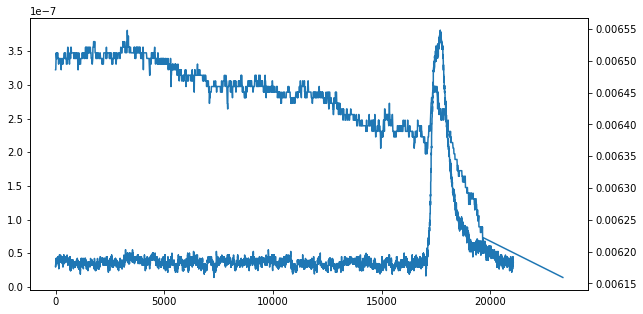

In [48]:
fig, ax1 = plt.subplots(figsize = (10, 5))
time1=sheet3_x_time[:][0]
time2=sheet3_lya_time[:][0]

ax2 = ax1.twinx()
ax1.plot(time1,sheet3_x[:][0])
ax2.plot(time2,sheet3_lya[:][0])

In [10]:
i=0
n=0
for  i in list_year:
    try:
        #print(i)
        if(n<list_year.index('20101019')):
            sheet_xrs = pd.read_csv('/home/tzy/curve_data/lc'+i+'_xrs_g14.sav_value.csv',header=None)
            n=n+1
        else:
            sheet_xrs = pd.read_csv('/home/tzy/curve_data/lc'+i+'_xrs_g15.sav_value.csv',header=None)
            n=n+1
    except:
        print(i)
        continue
        

20150819


In [48]:
list_1=[]
list_time_end=[]
sheet_lya_time = pd.read_csv('lya_2010-2016_time.csv')
for i in range(len(sheet_lya_time['DATE'])):
    list_1.append(sheet_lya_time['DATE'][i].split('-')[0]+sheet_lya_time['DATE'][i].split('-')[1]+sheet_lya_time['DATE'][i].split('-')[2])
    list_time_end.append(int(sheet_lya_time['PEAKT'][i][0:2])*3600+int(sheet_lya_time['PEAKT'][i][3:5])*60+int(sheet_lya_time['PEAKT'][i][6:8])+3600)
    #list_time_end是从当天00时开始到峰值时间往后延长一小时的总秒数
    


In [22]:
j

9480

In [14]:
list_time_end

[21067,
 35436,
 23283,
 51771,
 66789,
 15303,
 63497,
 14852,
 38881,
 83424,
 81726,
 42894,
 14359,
 5434,
 81546,
 39530,
 87297,
 52411,
 70012,
 72974,
 57169,
 45683,
 20228,
 70264,
 71880,
 5069,
 87508,
 71358,
 21074,
 86448,
 46095,
 61881,
 40096,
 59348,
 17043,
 64921,
 23456,
 8608,
 88774,
 43164,
 40735,
 25973,
 83797,
 31350,
 53428,
 26025,
 74272,
 7160,
 50780,
 87143,
 20769,
 11594,
 50505,
 58631,
 75491,
 52438,
 78957,
 10216,
 66710,
 76925,
 61972,
 41569,
 62141,
 13506,
 85554,
 9723,
 70973,
 73364,
 29016,
 4138,
 49918,
 62371,
 54248,
 5398,
 16190,
 60022,
 50808,
 20998,
 71636,
 26125,
 16853,
 46854,
 69741,
 11882,
 66528,
 49149,
 76681,
 9100,
 44270,
 62299,
 47399,
 15936,
 22245,
 31234,
 86992,
 27015,
 18424,
 4080,
 10864,
 46574]

In [47]:
sheet_lya_time['PEAKT'][0][6:8]

'07'

In [15]:
list_year.index('20101019')

3

In [2]:
#l_index=range(120)
#sheet3_x = pd.DataFrame(columns=l_index)

sheet3_x = pd.DataFrame()
k=0
for i in range(len(sheet_xrs[0])):
    for j in range(1,len(sheet_xrs[0][i].split('  '))):
        sheet3_x.loc[0,k]=float(sheet_xrs[0][i].split('  ')[j])
        k=k+1;
        print(i)

0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
4
5
5
5
5
5
5
6
6
6
6
6
6
7
7
7
7
7
7
8
8
8
8
8
8
9
9
9
9
9
9
10
10
10
10
10
10
11
11
11
11
11
11
12
12
12
12
12
12
13
13
13
13
13
13
14
14
14
14
14
14
15
15
15
15
15
15
16
16
16
16
16
16
17
17
17
17
17
17
18
18
18
18
18
18
19
19
19
19
19
19
20
20
20
20
20
20
21
21
21
21
21
21
22
22
22
22
22
22
23
23
23
23
23
23
24
24
24
24
24
24
25
25
25
25
25
25
26
26
26
26
26
26
27
27
27
27
27
27
28
28
28
28
28
28
29
29
29
29
29
29
30
30
30
30
30
30
31
31
31
31
31
31
32
32
32
32
32
32
33
33
33
33
33
33
34
34
34
34
34
34
35
35
35
35
35
35
36
36
36
36
36
36
37
37
37
37
37
37
38
38
38
38
38
38
39
39
39
39
39
39
40
40
40
40
40
40
41
41
41
41
41
41
42
42
42
42
42
42
43
43
43
43
43
43
44
44
44
44
44
44
45
45
45
45
45
45
46
46
46
46
46
46
47
47
47
47
47
47
48
48
48
48
48
48
49
49
49
49
49
49
50
50
50
50
50
50
51
51
51
51
51
51
52
52
52
52
52
52
53
53
53
53
53
53
54
54
54
54
54
54
55
55
55
55
55
55
56
56
56
56
56
56
57
57
57
57
57
57
58
58
58
58
58
5

370
370
370
371
371
371
371
371
371
372
372
372
372
372
372
373
373
373
373
373
373
374
374
374
374
374
374
375
375
375
375
375
375
376
376
376
376
376
376
377
377
377
377
377
377
378
378
378
378
378
378
379
379
379
379
379
379
380
380
380
380
380
380
381
381
381
381
381
381
382
382
382
382
382
382
383
383
383
383
383
383
384
384
384
384
384
384
385
385
385
385
385
385
386
386
386
386
386
386
387
387
387
387
387
387
388
388
388
388
388
388
389
389
389
389
389
389
390
390
390
390
390
390
391
391
391
391
391
391
392
392
392
392
392
392
393
393
393
393
393
393
394
394
394
394
394
394
395
395
395
395
395
395
396
396
396
396
396
396
397
397
397
397
397
397
398
398
398
398
398
398
399
399
399
399
399
399
400
400
400
400
400
400
401
401
401
401
401
401
402
402
402
402
402
402
403
403
403
403
403
403
404
404
404
404
404
404
405
405
405
405
405
405
406
406
406
406
406
406
407
407
407
407
407
407
408
408
408
408
408
408
409
409
409
409
409
409
410
410
410
410
410
410
411
411
411
411
411
411
412


712
712
713
713
713
713
713
713
714
714
714
714
714
714
715
715
715
715
715
715
716
716
716
716
716
716
717
717
717
717
717
717
718
718
718
718
718
718
719
719
719
719
719
719
720
720
720
720
720
720
721
721
721
721
721
721
722
722
722
722
722
722
723
723
723
723
723
723
724
724
724
724
724
724
725
725
725
725
725
725
726
726
726
726
726
726
727
727
727
727
727
727
728
728
728
728
728
728
729
729
729
729
729
729
730
730
730
730
730
730
731
731
731
731
731
731
732
732
732
732
732
732
733
733
733
733
733
733
734
734
734
734
734
734
735
735
735
735
735
735
736
736
736
736
736
736
737
737
737
737
737
737
738
738
738
738
738
738
739
739
739
739
739
739
740
740
740
740
740
740
741
741
741
741
741
741
742
742
742
742
742
742
743
743
743
743
743
743
744
744
744
744
744
744
745
745
745
745
745
745
746
746
746
746
746
746
747
747
747
747
747
747
748
748
748
748
748
748
749
749
749
749
749
749
750
750
750
750
750
750
751
751
751
751
751
751
752
752
752
752
752
752
753
753
753
753
753
753
754
754


1043
1043
1043
1044
1044
1044
1044
1044
1044
1045
1045
1045
1045
1045
1045
1046
1046
1046
1046
1046
1046
1047
1047
1047
1047
1047
1047
1048
1048
1048
1048
1048
1048
1049
1049
1049
1049
1049
1049
1050
1050
1050
1050
1050
1050
1051
1051
1051
1051
1051
1051
1052
1052
1052
1052
1052
1052
1053
1053
1053
1053
1053
1053
1054
1054
1054
1054
1054
1054
1055
1055
1055
1055
1055
1055
1056
1056
1056
1056
1056
1056
1057
1057
1057
1057
1057
1057
1058
1058
1058
1058
1058
1058
1059
1059
1059
1059
1059
1059
1060
1060
1060
1060
1060
1060
1061
1061
1061
1061
1061
1061
1062
1062
1062
1062
1062
1062
1063
1063
1063
1063
1063
1063
1064
1064
1064
1064
1064
1064
1065
1065
1065
1065
1065
1065
1066
1066
1066
1066
1066
1066
1067
1067
1067
1067
1067
1067
1068
1068
1068
1068
1068
1068
1069
1069
1069
1069
1069
1069
1070
1070
1070
1070
1070
1070
1071
1071
1071
1071
1071
1071
1072
1072
1072
1072
1072
1072
1073
1073
1073
1073
1073
1073
1074
1074
1074
1074
1074
1074
1075
1075
1075
1075
1075
1075
1076
1076
1076
1076
1076


1316
1316
1317
1317
1317
1317
1317
1317
1318
1318
1318
1318
1318
1318
1319
1319
1319
1319
1319
1319
1320
1320
1320
1320
1320
1320
1321
1321
1321
1321
1321
1321
1322
1322
1322
1322
1322
1322
1323
1323
1323
1323
1323
1323
1324
1324
1324
1324
1324
1324
1325
1325
1325
1325
1325
1325
1326
1326
1326
1326
1326
1326
1327
1327
1327
1327
1327
1327
1328
1328
1328
1328
1328
1328
1329
1329
1329
1329
1329
1329
1330
1330
1330
1330
1330
1330
1331
1331
1331
1331
1331
1331
1332
1332
1332
1332
1332
1332
1333
1333
1333
1333
1333
1333
1334
1334
1334
1334
1334
1334
1335
1335
1335
1335
1335
1335
1336
1336
1336
1336
1336
1336
1337
1337
1337
1337
1337
1337
1338
1338
1338
1338
1338
1338
1339
1339
1339
1339
1339
1339
1340
1340
1340
1340
1340
1340
1341
1341
1341
1341
1341
1341
1342
1342
1342
1342
1342
1342
1343
1343
1343
1343
1343
1343
1344
1344
1344
1344
1344
1344
1345
1345
1345
1345
1345
1345
1346
1346
1346
1346
1346
1346
1347
1347
1347
1347
1347
1347
1348
1348
1348
1348
1348
1348
1349
1349
1349
1349
1349
1349


1594
1594
1595
1595
1595
1595
1595
1595
1596
1596
1596
1596
1596
1596
1597
1597
1597
1597
1597
1597
1598
1598
1598
1598
1598
1598
1599
1599
1599
1599
1599
1599
1600
1600
1600
1600
1600
1600
1601
1601
1601
1601
1601
1601
1602
1602
1602
1602
1602
1602
1603
1603
1603
1603
1603
1603
1604
1604
1604
1604
1604
1604
1605
1605
1605
1605
1605
1605
1606
1606
1606
1606
1606
1606
1607
1607
1607
1607
1607
1607
1608
1608
1608
1608
1608
1608
1609
1609
1609
1609
1609
1609
1610
1610
1610
1610
1610
1610
1611
1611
1611
1611
1611
1611
1612
1612
1612
1612
1612
1612
1613
1613
1613
1613
1613
1613
1614
1614
1614
1614
1614
1614
1615
1615
1615
1615
1615
1615
1616
1616
1616
1616
1616
1616
1617
1617
1617
1617
1617
1617
1618
1618
1618
1618
1618
1618
1619
1619
1619
1619
1619
1619
1620
1620
1620
1620
1620
1620
1621
1621
1621
1621
1621
1621
1622
1622
1622
1622
1622
1622
1623
1623
1623
1623
1623
1623
1624
1624
1624
1624
1624
1624
1625
1625
1625
1625
1625
1625
1626
1626
1626
1626
1626
1626
1627
1627
1627
1627
1627
1627


1871
1872
1872
1872
1872
1872
1872
1873
1873
1873
1873
1873
1873
1874
1874
1874
1874
1874
1874
1875
1875
1875
1875
1875
1875
1876
1876
1876
1876
1876
1876
1877
1877
1877
1877
1877
1877
1878
1878
1878
1878
1878
1878
1879
1879
1879
1879
1879
1879
1880
1880
1880
1880
1880
1880
1881
1881
1881
1881
1881
1881
1882
1882
1882
1882
1882
1882
1883
1883
1883
1883
1883
1883
1884
1884
1884
1884
1884
1884
1885
1885
1885
1885
1885
1885
1886
1886
1886
1886
1886
1886
1887
1887
1887
1887
1887
1887
1888
1888
1888
1888
1888
1888
1889
1889
1889
1889
1889
1889
1890
1890
1890
1890
1890
1890
1891
1891
1891
1891
1891
1891
1892
1892
1892
1892
1892
1892
1893
1893
1893
1893
1893
1893
1894
1894
1894
1894
1894
1894
1895
1895
1895
1895
1895
1895
1896
1896
1896
1896
1896
1896
1897
1897
1897
1897
1897
1897
1898
1898
1898
1898
1898
1898
1899
1899
1899
1899
1899
1899
1900
1900
1900
1900
1900
1900
1901
1901
1901
1901
1901
1901
1902
1902
1902
1902
1902
1902
1903
1903
1903
1903
1903
1903
1904
1904
1904
1904
1904
1904
1905


2147
2147
2147
2147
2147
2148
2148
2148
2148
2148
2148
2149
2149
2149
2149
2149
2149
2150
2150
2150
2150
2150
2150
2151
2151
2151
2151
2151
2151
2152
2152
2152
2152
2152
2152
2153
2153
2153
2153
2153
2153
2154
2154
2154
2154
2154
2154
2155
2155
2155
2155
2155
2155
2156
2156
2156
2156
2156
2156
2157
2157
2157
2157
2157
2157
2158
2158
2158
2158
2158
2158
2159
2159
2159
2159
2159
2159
2160
2160
2160
2160
2160
2160
2161
2161
2161
2161
2161
2161
2162
2162
2162
2162
2162
2162
2163
2163
2163
2163
2163
2163
2164
2164
2164
2164
2164
2164
2165
2165
2165
2165
2165
2165
2166
2166
2166
2166
2166
2166
2167
2167
2167
2167
2167
2167
2168
2168
2168
2168
2168
2168
2169
2169
2169
2169
2169
2169
2170
2170
2170
2170
2170
2170
2171
2171
2171
2171
2171
2171
2172
2172
2172
2172
2172
2172
2173
2173
2173
2173
2173
2173
2174
2174
2174
2174
2174
2174
2175
2175
2175
2175
2175
2175
2176
2176
2176
2176
2176
2176
2177
2177
2177
2177
2177
2177
2178
2178
2178
2178
2178
2178
2179
2179
2179
2179
2179
2179
2180
2180
2180


2420
2420
2421
2421
2421
2421
2421
2421
2422
2422
2422
2422
2422
2422
2423
2423
2423
2423
2423
2423
2424
2424
2424
2424
2424
2424
2425
2425
2425
2425
2425
2425
2426
2426
2426
2426
2426
2426
2427
2427
2427
2427
2427
2427
2428
2428
2428
2428
2428
2428
2429
2429
2429
2429
2429
2429
2430
2430
2430
2430
2430
2430
2431
2431
2431
2431
2431
2431
2432
2432
2432
2432
2432
2432
2433
2433
2433
2433
2433
2433
2434
2434
2434
2434
2434
2434
2435
2435
2435
2435
2435
2435
2436
2436
2436
2436
2436
2436
2437
2437
2437
2437
2437
2437
2438
2438
2438
2438
2438
2438
2439
2439
2439
2439
2439
2439
2440
2440
2440
2440
2440
2440
2441
2441
2441
2441
2441
2441
2442
2442
2442
2442
2442
2442
2443
2443
2443
2443
2443
2443
2444
2444
2444
2444
2444
2444
2445
2445
2445
2445
2445
2445
2446
2446
2446
2446
2446
2446
2447
2447
2447
2447
2447
2447
2448
2448
2448
2448
2448
2448
2449
2449
2449
2449
2449
2449
2450
2450
2450
2450
2450
2450
2451
2451
2451
2451
2451
2451
2452
2452
2452
2452
2452
2452
2453
2453
2453
2453
2453
2453


2694
2694
2694
2695
2695
2695
2695
2695
2695
2696
2696
2696
2696
2696
2696
2697
2697
2697
2697
2697
2697
2698
2698
2698
2698
2698
2698
2699
2699
2699
2699
2699
2699
2700
2700
2700
2700
2700
2700
2701
2701
2701
2701
2701
2701
2702
2702
2702
2702
2702
2702
2703
2703
2703
2703
2703
2703
2704
2704
2704
2704
2704
2704
2705
2705
2705
2705
2705
2705
2706
2706
2706
2706
2706
2706
2707
2707
2707
2707
2707
2707
2708
2708
2708
2708
2708
2708
2709
2709
2709
2709
2709
2709
2710
2710
2710
2710
2710
2710
2711
2711
2711
2711
2711
2711
2712
2712
2712
2712
2712
2712
2713
2713
2713
2713
2713
2713
2714
2714
2714
2714
2714
2714
2715
2715
2715
2715
2715
2715
2716
2716
2716
2716
2716
2716
2717
2717
2717
2717
2717
2717
2718
2718
2718
2718
2718
2718
2719
2719
2719
2719
2719
2719
2720
2720
2720
2720
2720
2720
2721
2721
2721
2721
2721
2721
2722
2722
2722
2722
2722
2722
2723
2723
2723
2723
2723
2723
2724
2724
2724
2724
2724
2724
2725
2725
2725
2725
2725
2725
2726
2726
2726
2726
2726
2726
2727
2727
2727
2727
2727


2968
2968
2968
2968
2968
2969
2969
2969
2969
2969
2969
2970
2970
2970
2970
2970
2970
2971
2971
2971
2971
2971
2971
2972
2972
2972
2972
2972
2972
2973
2973
2973
2973
2973
2973
2974
2974
2974
2974
2974
2974
2975
2975
2975
2975
2975
2975
2976
2976
2976
2976
2976
2976
2977
2977
2977
2977
2977
2977
2978
2978
2978
2978
2978
2978
2979
2979
2979
2979
2979
2979
2980
2980
2980
2980
2980
2980
2981
2981
2981
2981
2981
2981
2982
2982
2982
2982
2982
2982
2983
2983
2983
2983
2983
2983
2984
2984
2984
2984
2984
2984
2985
2985
2985
2985
2985
2985
2986
2986
2986
2986
2986
2986
2987
2987
2987
2987
2987
2987
2988
2988
2988
2988
2988
2988
2989
2989
2989
2989
2989
2989
2990
2990
2990
2990
2990
2990
2991
2991
2991
2991
2991
2991
2992
2992
2992
2992
2992
2992
2993
2993
2993
2993
2993
2993
2994
2994
2994
2994
2994
2994
2995
2995
2995
2995
2995
2995
2996
2996
2996
2996
2996
2996
2997
2997
2997
2997
2997
2997
2998
2998
2998
2998
2998
2998
2999
2999
2999
2999
2999
2999
3000
3000
3000
3000
3000
3000
3001
3001
3001


3514
3515
3515
3515
3515
3515
3515
3516
3516
3516
3516
3516
3516
3517
3517
3517
3517
3517
3517
3518
3518
3518
3518
3518
3518
3519
3519
3519
3519
3519
3519
3520
3520
3520
3520
3520
3520
3521
3521
3521
3521
3521
3521
3522
3522
3522
3522
3522
3522
3523
3523
3523
3523
3523
3523
3524
3524
3524
3524
3524
3524
3525
3525
3525
3525
3525
3525
3526
3526
3526
3526
3526
3526
3527
3527
3527
3527
3527
3527
3528
3528
3528
3528
3528
3528
3529
3529
3529
3529
3529
3529
3530
3530
3530
3530
3530
3530
3531
3531
3531
3531
3531
3531
3532
3532
3532
3532
3532
3532
3533
3533
3533
3533
3533
3533
3534
3534
3534
3534
3534
3534
3535
3535
3535
3535
3535
3535
3536
3536
3536
3536
3536
3536
3537
3537
3537
3537
3537
3537
3538
3538
3538
3538
3538
3538
3539
3539
3539
3539
3539
3539
3540
3540
3540
3540
3540
3540
3541
3541
3541
3541
3541
3541
3542
3542
3542
3542
3542
3542
3543
3543
3543
3543
3543
3543
3544
3544
3544
3544
3544
3544
3545
3545
3545
3545
3545
3545
3546
3546
3546
3546
3546
3546
3547
3547
3547
3547
3547
3547
3548


3789
3790
3790
3790
3790
3790
3790
3791
3791
3791
3791
3791
3791
3792
3792
3792
3792
3792
3792
3793
3793
3793
3793
3793
3793
3794
3794
3794
3794
3794
3794
3795
3795
3795
3795
3795
3795
3796
3796
3796
3796
3796
3796
3797
3797
3797
3797
3797
3797
3798
3798
3798
3798
3798
3798
3799
3799
3799
3799
3799
3799
3800
3800
3800
3800
3800
3800
3801
3801
3801
3801
3801
3801
3802
3802
3802
3802
3802
3802
3803
3803
3803
3803
3803
3803
3804
3804
3804
3804
3804
3804
3805
3805
3805
3805
3805
3805
3806
3806
3806
3806
3806
3806
3807
3807
3807
3807
3807
3807
3808
3808
3808
3808
3808
3808
3809
3809
3809
3809
3809
3809
3810
3810
3810
3810
3810
3810
3811
3811
3811
3811
3811
3811
3812
3812
3812
3812
3812
3812
3813
3813
3813
3813
3813
3813
3814
3814
3814
3814
3814
3814
3815
3815
3815
3815
3815
3815
3816
3816
3816
3816
3816
3816
3817
3817
3817
3817
3817
3817
3818
3818
3818
3818
3818
3818
3819
3819
3819
3819
3819
3819
3820
3820
3820
3820
3820
3820
3821
3821
3821
3821
3821
3821
3822
3822
3822
3822
3822
3822
3823


4064
4065
4065
4065
4065
4065
4065
4066
4066
4066
4066
4066
4066
4067
4067
4067
4067
4067
4067
4068
4068
4068
4068
4068
4068
4069
4069
4069
4069
4069
4069
4070
4070
4070
4070
4070
4070
4071
4071
4071
4071
4071
4071
4072
4072
4072
4072
4072
4072
4073
4073
4073
4073
4073
4073
4074
4074
4074
4074
4074
4074
4075
4075
4075
4075
4075
4075
4076
4076
4076
4076
4076
4076
4077
4077
4077
4077
4077
4077
4078
4078
4078
4078
4078
4078
4079
4079
4079
4079
4079
4079
4080
4080
4080
4080
4080
4080
4081
4081
4081
4081
4081
4081
4082
4082
4082
4082
4082
4082
4083
4083
4083
4083
4083
4083
4084
4084
4084
4084
4084
4084
4085
4085
4085
4085
4085
4085
4086
4086
4086
4086
4086
4086
4087
4087
4087
4087
4087
4087
4088
4088
4088
4088
4088
4088
4089
4089
4089
4089
4089
4089
4090
4090
4090
4090
4090
4090
4091
4091
4091
4091
4091
4091
4092
4092
4092
4092
4092
4092
4093
4093
4093
4093
4093
4093
4094
4094
4094
4094
4094
4094
4095
4095
4095
4095
4095
4095
4096
4096
4096
4096
4096
4096
4097
4097
4097
4097
4097
4097
4098


4344
4344
4345
4345
4345
4345
4345
4345
4346
4346
4346
4346
4346
4346
4347
4347
4347
4347
4347
4347
4348
4348
4348
4348
4348
4348
4349
4349
4349
4349
4349
4349
4350
4350
4350
4350
4350
4350
4351
4351
4351
4351
4351
4351
4352
4352
4352
4352
4352
4352
4353
4353
4353
4353
4353
4353
4354
4354
4354
4354
4354
4354
4355
4355
4355
4355
4355
4355
4356
4356
4356
4356
4356
4356
4357
4357
4357
4357
4357
4357
4358
4358
4358
4358
4358
4358
4359
4359
4359
4359
4359
4359
4360
4360
4360
4360
4360
4360
4361
4361
4361
4361
4361
4361
4362
4362
4362
4362
4362
4362
4363
4363
4363
4363
4363
4363
4364
4364
4364
4364
4364
4364
4365
4365
4365
4365
4365
4365
4366
4366
4366
4366
4366
4366
4367
4367
4367
4367
4367
4367
4368
4368
4368
4368
4368
4368
4369
4369
4369
4369
4369
4369
4370
4370
4370
4370
4370
4370
4371
4371
4371
4371
4371
4371
4372
4372
4372
4372
4372
4372
4373
4373
4373
4373
4373
4373
4374
4374
4374
4374
4374
4374
4375
4375
4375
4375
4375
4375
4376
4376
4376
4376
4376
4376
4377
4377
4377
4377
4377
4377


4620
4620
4620
4620
4621
4621
4621
4621
4621
4621
4622
4622
4622
4622
4622
4622
4623
4623
4623
4623
4623
4623
4624
4624
4624
4624
4624
4624
4625
4625
4625
4625
4625
4625
4626
4626
4626
4626
4626
4626
4627
4627
4627
4627
4627
4627
4628
4628
4628
4628
4628
4628
4629
4629
4629
4629
4629
4629
4630
4630
4630
4630
4630
4630
4631
4631
4631
4631
4631
4631
4632
4632
4632
4632
4632
4632
4633
4633
4633
4633
4633
4633
4634
4634
4634
4634
4634
4634
4635
4635
4635
4635
4635
4635
4636
4636
4636
4636
4636
4636
4637
4637
4637
4637
4637
4637
4638
4638
4638
4638
4638
4638
4639
4639
4639
4639
4639
4639
4640
4640
4640
4640
4640
4640
4641
4641
4641
4641
4641
4641
4642
4642
4642
4642
4642
4642
4643
4643
4643
4643
4643
4643
4644
4644
4644
4644
4644
4644
4645
4645
4645
4645
4645
4645
4646
4646
4646
4646
4646
4646
4647
4647
4647
4647
4647
4647
4648
4648
4648
4648
4648
4648
4649
4649
4649
4649
4649
4649
4650
4650
4650
4650
4650
4650
4651
4651
4651
4651
4651
4651
4652
4652
4652
4652
4652
4652
4653
4653
4653
4653


4894
4894
4895
4895
4895
4895
4895
4895
4896
4896
4896
4896
4896
4896
4897
4897
4897
4897
4897
4897
4898
4898
4898
4898
4898
4898
4899
4899
4899
4899
4899
4899
4900
4900
4900
4900
4900
4900
4901
4901
4901
4901
4901
4901
4902
4902
4902
4902
4902
4902
4903
4903
4903
4903
4903
4903
4904
4904
4904
4904
4904
4904
4905
4905
4905
4905
4905
4905
4906
4906
4906
4906
4906
4906
4907
4907
4907
4907
4907
4907
4908
4908
4908
4908
4908
4908
4909
4909
4909
4909
4909
4909
4910
4910
4910
4910
4910
4910
4911
4911
4911
4911
4911
4911
4912
4912
4912
4912
4912
4912
4913
4913
4913
4913
4913
4913
4914
4914
4914
4914
4914
4914
4915
4915
4915
4915
4915
4915
4916
4916
4916
4916
4916
4916
4917
4917
4917
4917
4917
4917
4918
4918
4918
4918
4918
4918
4919
4919
4919
4919
4919
4919
4920
4920
4920
4920
4920
4920
4921
4921
4921
4921
4921
4921
4922
4922
4922
4922
4922
4922
4923
4923
4923
4923
4923
4923
4924
4924
4924
4924
4924
4924
4925
4925
4925
4925
4925
4925
4926
4926
4926
4926
4926
4926
4927
4927
4927
4927
4927
4927


5172
5172
5173
5173
5173
5173
5173
5173
5174
5174
5174
5174
5174
5174
5175
5175
5175
5175
5175
5175
5176
5176
5176
5176
5176
5176
5177
5177
5177
5177
5177
5177
5178
5178
5178
5178
5178
5178
5179
5179
5179
5179
5179
5179
5180
5180
5180
5180
5180
5180
5181
5181
5181
5181
5181
5181
5182
5182
5182
5182
5182
5182
5183
5183
5183
5183
5183
5183
5184
5184
5184
5184
5184
5184
5185
5185
5185
5185
5185
5185
5186
5186
5186
5186
5186
5186
5187
5187
5187
5187
5187
5187
5188
5188
5188
5188
5188
5188
5189
5189
5189
5189
5189
5189
5190
5190
5190
5190
5190
5190
5191
5191
5191
5191
5191
5191
5192
5192
5192
5192
5192
5192
5193
5193
5193
5193
5193
5193
5194
5194
5194
5194
5194
5194
5195
5195
5195
5195
5195
5195
5196
5196
5196
5196
5196
5196
5197
5197
5197
5197
5197
5197
5198
5198
5198
5198
5198
5198
5199
5199
5199
5199
5199
5199
5200
5200
5200
5200
5200
5200
5201
5201
5201
5201
5201
5201
5202
5202
5202
5202
5202
5202
5203
5203
5203
5203
5203
5203
5204
5204
5204
5204
5204
5204
5205
5205
5205
5205
5205
5205


5446
5446
5446
5446
5447
5447
5447
5447
5447
5447
5448
5448
5448
5448
5448
5448
5449
5449
5449
5449
5449
5449
5450
5450
5450
5450
5450
5450
5451
5451
5451
5451
5451
5451
5452
5452
5452
5452
5452
5452
5453
5453
5453
5453
5453
5453
5454
5454
5454
5454
5454
5454
5455
5455
5455
5455
5455
5455
5456
5456
5456
5456
5456
5456
5457
5457
5457
5457
5457
5457
5458
5458
5458
5458
5458
5458
5459
5459
5459
5459
5459
5459
5460
5460
5460
5460
5460
5460
5461
5461
5461
5461
5461
5461
5462
5462
5462
5462
5462
5462
5463
5463
5463
5463
5463
5463
5464
5464
5464
5464
5464
5464
5465
5465
5465
5465
5465
5465
5466
5466
5466
5466
5466
5466
5467
5467
5467
5467
5467
5467
5468
5468
5468
5468
5468
5468
5469
5469
5469
5469
5469
5469
5470
5470
5470
5470
5470
5470
5471
5471
5471
5471
5471
5471
5472
5472
5472
5472
5472
5472
5473
5473
5473
5473
5473
5473
5474
5474
5474
5474
5474
5474
5475
5475
5475
5475
5475
5475
5476
5476
5476
5476
5476
5476
5477
5477
5477
5477
5477
5477
5478
5478
5478
5478
5478
5478
5479
5479
5479
5479


5720
5720
5720
5720
5720
5720
5721
5721
5721
5721
5721
5721
5722
5722
5722
5722
5722
5722
5723
5723
5723
5723
5723
5723
5724
5724
5724
5724
5724
5724
5725
5725
5725
5725
5725
5725
5726
5726
5726
5726
5726
5726
5727
5727
5727
5727
5727
5727
5728
5728
5728
5728
5728
5728
5729
5729
5729
5729
5729
5729
5730
5730
5730
5730
5730
5730
5731
5731
5731
5731
5731
5731
5732
5732
5732
5732
5732
5732
5733
5733
5733
5733
5733
5733
5734
5734
5734
5734
5734
5734
5735
5735
5735
5735
5735
5735
5736
5736
5736
5736
5736
5736
5737
5737
5737
5737
5737
5737
5738
5738
5738
5738
5738
5738
5739
5739
5739
5739
5739
5739
5740
5740
5740
5740
5740
5740
5741
5741
5741
5741
5741
5741
5742
5742
5742
5742
5742
5742
5743
5743
5743
5743
5743
5743
5744
5744
5744
5744
5744
5744
5745
5745
5745
5745
5745
5745
5746
5746
5746
5746
5746
5746
5747
5747
5747
5747
5747
5747
5748
5748
5748
5748
5748
5748
5749
5749
5749
5749
5749
5749
5750
5750
5750
5750
5750
5750
5751
5751
5751
5751
5751
5751
5752
5752
5752
5752
5752
5752
5753
5753


5995
5996
5996
5996
5996
5996
5996
5997
5997
5997
5997
5997
5997
5998
5998
5998
5998
5998
5998
5999
5999
5999
5999
5999
5999
6000
6000
6000
6000
6000
6000
6001
6001
6001
6001
6001
6001
6002
6002
6002
6002
6002
6002
6003
6003
6003
6003
6003
6003
6004
6004
6004
6004
6004
6004
6005
6005
6005
6005
6005
6005
6006
6006
6006
6006
6006
6006
6007
6007
6007
6007
6007
6007
6008
6008
6008
6008
6008
6008
6009
6009
6009
6009
6009
6009
6010
6010
6010
6010
6010
6010
6011
6011
6011
6011
6011
6011
6012
6012
6012
6012
6012
6012
6013
6013
6013
6013
6013
6013
6014
6014
6014
6014
6014
6014
6015
6015
6015
6015
6015
6015
6016
6016
6016
6016
6016
6016
6017
6017
6017
6017
6017
6017
6018
6018
6018
6018
6018
6018
6019
6019
6019
6019
6019
6019
6020
6020
6020
6020
6020
6020
6021
6021
6021
6021
6021
6021
6022
6022
6022
6022
6022
6022
6023
6023
6023
6023
6023
6023
6024
6024
6024
6024
6024
6024
6025
6025
6025
6025
6025
6025
6026
6026
6026
6026
6026
6026
6027
6027
6027
6027
6027
6027
6028
6028
6028
6028
6028
6028
6029


6269
6269
6269
6269
6269
6270
6270
6270
6270
6270
6270
6271
6271
6271
6271
6271
6271
6272
6272
6272
6272
6272
6272
6273
6273
6273
6273
6273
6273
6274
6274
6274
6274
6274
6274
6275
6275
6275
6275
6275
6275
6276
6276
6276
6276
6276
6276
6277
6277
6277
6277
6277
6277
6278
6278
6278
6278
6278
6278
6279
6279
6279
6279
6279
6279
6280
6280
6280
6280
6280
6280
6281
6281
6281
6281
6281
6281
6282
6282
6282
6282
6282
6282
6283
6283
6283
6283
6283
6283
6284
6284
6284
6284
6284
6284
6285
6285
6285
6285
6285
6285
6286
6286
6286
6286
6286
6286
6287
6287
6287
6287
6287
6287
6288
6288
6288
6288
6288
6288
6289
6289
6289
6289
6289
6289
6290
6290
6290
6290
6290
6290
6291
6291
6291
6291
6291
6291
6292
6292
6292
6292
6292
6292
6293
6293
6293
6293
6293
6293
6294
6294
6294
6294
6294
6294
6295
6295
6295
6295
6295
6295
6296
6296
6296
6296
6296
6296
6297
6297
6297
6297
6297
6297
6298
6298
6298
6298
6298
6298
6299
6299
6299
6299
6299
6299
6300
6300
6300
6300
6300
6300
6301
6301
6301
6301
6301
6301
6302
6302
6302


6543
6543
6543
6543
6543
6543
6544
6544
6544
6544
6544
6544
6545
6545
6545
6545
6545
6545
6546
6546
6546
6546
6546
6546
6547
6547
6547
6547
6547
6547
6548
6548
6548
6548
6548
6548
6549
6549
6549
6549
6549
6549
6550
6550
6550
6550
6550
6550
6551
6551
6551
6551
6551
6551
6552
6552
6552
6552
6552
6552
6553
6553
6553
6553
6553
6553
6554
6554
6554
6554
6554
6554
6555
6555
6555
6555
6555
6555
6556
6556
6556
6556
6556
6556
6557
6557
6557
6557
6557
6557
6558
6558
6558
6558
6558
6558
6559
6559
6559
6559
6559
6559
6560
6560
6560
6560
6560
6560
6561
6561
6561
6561
6561
6561
6562
6562
6562
6562
6562
6562
6563
6563
6563
6563
6563
6563
6564
6564
6564
6564
6564
6564
6565
6565
6565
6565
6565
6565
6566
6566
6566
6566
6566
6566
6567
6567
6567
6567
6567
6567
6568
6568
6568
6568
6568
6568
6569
6569
6569
6569
6569
6569
6570
6570
6570
6570
6570
6570
6571
6571
6571
6571
6571
6571
6572
6572
6572
6572
6572
6572
6573
6573
6573
6573
6573
6573
6574
6574
6574
6574
6574
6574
6575
6575
6575
6575
6575
6575
6576
6576


6818
6818
6819
6819
6819
6819
6819
6819
6820
6820
6820
6820
6820
6820
6821
6821
6821
6821
6821
6821
6822
6822
6822
6822
6822
6822
6823
6823
6823
6823
6823
6823
6824
6824
6824
6824
6824
6824
6825
6825
6825
6825
6825
6825
6826
6826
6826
6826
6826
6826
6827
6827
6827
6827
6827
6827
6828
6828
6828
6828
6828
6828
6829
6829
6829
6829
6829
6829
6830
6830
6830
6830
6830
6830
6831
6831
6831
6831
6831
6831
6832
6832
6832
6832
6832
6832
6833
6833
6833
6833
6833
6833
6834
6834
6834
6834
6834
6834
6835
6835
6835
6835
6835
6835
6836
6836
6836
6836
6836
6836
6837
6837
6837
6837
6837
6837
6838
6838
6838
6838
6838
6838
6839
6839
6839
6839
6839
6839
6840
6840
6840
6840
6840
6840
6841
6841
6841
6841
6841
6841
6842
6842
6842
6842
6842
6842
6843
6843
6843
6843
6843
6843
6844
6844
6844
6844
6844
6844
6845
6845
6845
6845
6845
6845
6846
6846
6846
6846
6846
6846
6847
6847
6847
6847
6847
6847
6848
6848
6848
6848
6848
6848
6849
6849
6849
6849
6849
6849
6850
6850
6850
6850
6850
6850
6851
6851
6851
6851
6851
6851


7092
7092
7092
7092
7092
7092
7093
7093
7093
7093
7093
7093
7094
7094
7094
7094
7094
7094
7095
7095
7095
7095
7095
7095
7096
7096
7096
7096
7096
7096
7097
7097
7097
7097
7097
7097
7098
7098
7098
7098
7098
7098
7099
7099
7099
7099
7099
7099
7100
7100
7100
7100
7100
7100
7101
7101
7101
7101
7101
7101
7102
7102
7102
7102
7102
7102
7103
7103
7103
7103
7103
7103
7104
7104
7104
7104
7104
7104
7105
7105
7105
7105
7105
7105
7106
7106
7106
7106
7106
7106
7107
7107
7107
7107
7107
7107
7108
7108
7108
7108
7108
7108
7109
7109
7109
7109
7109
7109
7110
7110
7110
7110
7110
7110
7111
7111
7111
7111
7111
7111
7112
7112
7112
7112
7112
7112
7113
7113
7113
7113
7113
7113
7114
7114
7114
7114
7114
7114
7115
7115
7115
7115
7115
7115
7116
7116
7116
7116
7116
7116
7117
7117
7117
7117
7117
7117
7118
7118
7118
7118
7118
7118
7119
7119
7119
7119
7119
7119
7120
7120
7120
7120
7120
7120
7121
7121
7121
7121
7121
7121
7122
7122
7122
7122
7122
7122
7123
7123
7123
7123
7123
7123
7124
7124
7124
7124
7124
7124
7125
7125


7368
7368
7369
7369
7369
7369
7369
7369
7370
7370
7370
7370
7370
7370
7371
7371
7371
7371
7371
7371
7372
7372
7372
7372
7372
7372
7373
7373
7373
7373
7373
7373
7374
7374
7374
7374
7374
7374
7375
7375
7375
7375
7375
7375
7376
7376
7376
7376
7376
7376
7377
7377
7377
7377
7377
7377
7378
7378
7378
7378
7378
7378
7379
7379
7379
7379
7379
7379
7380
7380
7380
7380
7380
7380
7381
7381
7381
7381
7381
7381
7382
7382
7382
7382
7382
7382
7383
7383
7383
7383
7383
7383
7384
7384
7384
7384
7384
7384
7385
7385
7385
7385
7385
7385
7386
7386
7386
7386
7386
7386
7387
7387
7387
7387
7387
7387
7388
7388
7388
7388
7388
7388
7389
7389
7389
7389
7389
7389
7390
7390
7390
7390
7390
7390
7391
7391
7391
7391
7391
7391
7392
7392
7392
7392
7392
7392
7393
7393
7393
7393
7393
7393
7394
7394
7394
7394
7394
7394
7395
7395
7395
7395
7395
7395
7396
7396
7396
7396
7396
7396
7397
7397
7397
7397
7397
7397
7398
7398
7398
7398
7398
7398
7399
7399
7399
7399
7399
7399
7400
7400
7400
7400
7400
7400
7401
7401
7401
7401
7401
7401


7646
7646
7647
7647
7647
7647
7647
7647
7648
7648
7648
7648
7648
7648
7649
7649
7649
7649
7649
7649
7650
7650
7650
7650
7650
7650
7651
7651
7651
7651
7651
7651
7652
7652
7652
7652
7652
7652
7653
7653
7653
7653
7653
7653
7654
7654
7654
7654
7654
7654
7655
7655
7655
7655
7655
7655
7656
7656
7656
7656
7656
7656
7657
7657
7657
7657
7657
7657
7658
7658
7658
7658
7658
7658
7659
7659
7659
7659
7659
7659
7660
7660
7660
7660
7660
7660
7661
7661
7661
7661
7661
7661
7662
7662
7662
7662
7662
7662
7663
7663
7663
7663
7663
7663
7664
7664
7664
7664
7664
7664
7665
7665
7665
7665
7665
7665
7666
7666
7666
7666
7666
7666
7667
7667
7667
7667
7667
7667
7668
7668
7668
7668
7668
7668
7669
7669
7669
7669
7669
7669
7670
7670
7670
7670
7670
7670
7671
7671
7671
7671
7671
7671
7672
7672
7672
7672
7672
7672
7673
7673
7673
7673
7673
7673
7674
7674
7674
7674
7674
7674
7675
7675
7675
7675
7675
7675
7676
7676
7676
7676
7676
7676
7677
7677
7677
7677
7677
7677
7678
7678
7678
7678
7678
7678
7679
7679
7679
7679
7679
7679


7921
7921
7921
7921
7922
7922
7922
7922
7922
7922
7923
7923
7923
7923
7923
7923
7924
7924
7924
7924
7924
7924
7925
7925
7925
7925
7925
7925
7926
7926
7926
7926
7926
7926
7927
7927
7927
7927
7927
7927
7928
7928
7928
7928
7928
7928
7929
7929
7929
7929
7929
7929
7930
7930
7930
7930
7930
7930
7931
7931
7931
7931
7931
7931
7932
7932
7932
7932
7932
7932
7933
7933
7933
7933
7933
7933
7934
7934
7934
7934
7934
7934
7935
7935
7935
7935
7935
7935
7936
7936
7936
7936
7936
7936
7937
7937
7937
7937
7937
7937
7938
7938
7938
7938
7938
7938
7939
7939
7939
7939
7939
7939
7940
7940
7940
7940
7940
7940
7941
7941
7941
7941
7941
7941
7942
7942
7942
7942
7942
7942
7943
7943
7943
7943
7943
7943
7944
7944
7944
7944
7944
7944
7945
7945
7945
7945
7945
7945
7946
7946
7946
7946
7946
7946
7947
7947
7947
7947
7947
7947
7948
7948
7948
7948
7948
7948
7949
7949
7949
7949
7949
7949
7950
7950
7950
7950
7950
7950
7951
7951
7951
7951
7951
7951
7952
7952
7952
7952
7952
7952
7953
7953
7953
7953
7953
7953
7954
7954
7954
7954


8469
8469
8469
8470
8470
8470
8470
8470
8470
8471
8471
8471
8471
8471
8471
8472
8472
8472
8472
8472
8472
8473
8473
8473
8473
8473
8473
8474
8474
8474
8474
8474
8474
8475
8475
8475
8475
8475
8475
8476
8476
8476
8476
8476
8476
8477
8477
8477
8477
8477
8477
8478
8478
8478
8478
8478
8478
8479
8479
8479
8479
8479
8479
8480
8480
8480
8480
8480
8480
8481
8481
8481
8481
8481
8481
8482
8482
8482
8482
8482
8482
8483
8483
8483
8483
8483
8483
8484
8484
8484
8484
8484
8484
8485
8485
8485
8485
8485
8485
8486
8486
8486
8486
8486
8486
8487
8487
8487
8487
8487
8487
8488
8488
8488
8488
8488
8488
8489
8489
8489
8489
8489
8489
8490
8490
8490
8490
8490
8490
8491
8491
8491
8491
8491
8491
8492
8492
8492
8492
8492
8492
8493
8493
8493
8493
8493
8493
8494
8494
8494
8494
8494
8494
8495
8495
8495
8495
8495
8495
8496
8496
8496
8496
8496
8496
8497
8497
8497
8497
8497
8497
8498
8498
8498
8498
8498
8498
8499
8499
8499
8499
8499
8499
8500
8500
8500
8500
8500
8500
8501
8501
8501
8501
8501
8501
8502
8502
8502
8502
8502


8744
8744
8744
8744
8744
8744
8745
8745
8745
8745
8745
8745
8746
8746
8746
8746
8746
8746
8747
8747
8747
8747
8747
8747
8748
8748
8748
8748
8748
8748
8749
8749
8749
8749
8749
8749
8750
8750
8750
8750
8750
8750
8751
8751
8751
8751
8751
8751
8752
8752
8752
8752
8752
8752
8753
8753
8753
8753
8753
8753
8754
8754
8754
8754
8754
8754
8755
8755
8755
8755
8755
8755
8756
8756
8756
8756
8756
8756
8757
8757
8757
8757
8757
8757
8758
8758
8758
8758
8758
8758
8759
8759
8759
8759
8759
8759
8760
8760
8760
8760
8760
8760
8761
8761
8761
8761
8761
8761
8762
8762
8762
8762
8762
8762
8763
8763
8763
8763
8763
8763
8764
8764
8764
8764
8764
8764
8765
8765
8765
8765
8765
8765
8766
8766
8766
8766
8766
8766
8767
8767
8767
8767
8767
8767
8768
8768
8768
8768
8768
8768
8769
8769
8769
8769
8769
8769
8770
8770
8770
8770
8770
8770
8771
8771
8771
8771
8771
8771
8772
8772
8772
8772
8772
8772
8773
8773
8773
8773
8773
8773
8774
8774
8774
8774
8774
8774
8775
8775
8775
8775
8775
8775
8776
8776
8776
8776
8776
8776
8777
8777


9018
9018
9018
9018
9019
9019
9019
9019
9019
9019
9020
9020
9020
9020
9020
9020
9021
9021
9021
9021
9021
9021
9022
9022
9022
9022
9022
9022
9023
9023
9023
9023
9023
9023
9024
9024
9024
9024
9024
9024
9025
9025
9025
9025
9025
9025
9026
9026
9026
9026
9026
9026
9027
9027
9027
9027
9027
9027
9028
9028
9028
9028
9028
9028
9029
9029
9029
9029
9029
9029
9030
9030
9030
9030
9030
9030
9031
9031
9031
9031
9031
9031
9032
9032
9032
9032
9032
9032
9033
9033
9033
9033
9033
9033
9034
9034
9034
9034
9034
9034
9035
9035
9035
9035
9035
9035
9036
9036
9036
9036
9036
9036
9037
9037
9037
9037
9037
9037
9038
9038
9038
9038
9038
9038
9039
9039
9039
9039
9039
9039
9040
9040
9040
9040
9040
9040
9041
9041
9041
9041
9041
9041
9042
9042
9042
9042
9042
9042
9043
9043
9043
9043
9043
9043
9044
9044
9044
9044
9044
9044
9045
9045
9045
9045
9045
9045
9046
9046
9046
9046
9046
9046
9047
9047
9047
9047
9047
9047
9048
9048
9048
9048
9048
9048
9049
9049
9049
9049
9049
9049
9050
9050
9050
9050
9050
9050
9051
9051
9051
9051


9293
9293
9293
9293
9293
9293
9294
9294
9294
9294
9294
9294
9295
9295
9295
9295
9295
9295
9296
9296
9296
9296
9296
9296
9297
9297
9297
9297
9297
9297
9298
9298
9298
9298
9298
9298
9299
9299
9299
9299
9299
9299
9300
9300
9300
9300
9300
9300
9301
9301
9301
9301
9301
9301
9302
9302
9302
9302
9302
9302
9303
9303
9303
9303
9303
9303
9304
9304
9304
9304
9304
9304
9305
9305
9305
9305
9305
9305
9306
9306
9306
9306
9306
9306
9307
9307
9307
9307
9307
9307
9308
9308
9308
9308
9308
9308
9309
9309
9309
9309
9309
9309
9310
9310
9310
9310
9310
9310
9311
9311
9311
9311
9311
9311
9312
9312
9312
9312
9312
9312
9313
9313
9313
9313
9313
9313
9314
9314
9314
9314
9314
9314
9315
9315
9315
9315
9315
9315
9316
9316
9316
9316
9316
9316
9317
9317
9317
9317
9317
9317
9318
9318
9318
9318
9318
9318
9319
9319
9319
9319
9319
9319
9320
9320
9320
9320
9320
9320
9321
9321
9321
9321
9321
9321
9322
9322
9322
9322
9322
9322
9323
9323
9323
9323
9323
9323
9324
9324
9324
9324
9324
9324
9325
9325
9325
9325
9325
9325
9326
9326


9568
9568
9569
9569
9569
9569
9569
9569
9570
9570
9570
9570
9570
9570
9571
9571
9571
9571
9571
9571
9572
9572
9572
9572
9572
9572
9573
9573
9573
9573
9573
9573
9574
9574
9574
9574
9574
9574
9575
9575
9575
9575
9575
9575
9576
9576
9576
9576
9576
9576
9577
9577
9577
9577
9577
9577
9578
9578
9578
9578
9578
9578
9579
9579
9579
9579
9579
9579
9580
9580
9580
9580
9580
9580
9581
9581
9581
9581
9581
9581
9582
9582
9582
9582
9582
9582
9583
9583
9583
9583
9583
9583
9584
9584
9584
9584
9584
9584
9585
9585
9585
9585
9585
9585
9586
9586
9586
9586
9586
9586
9587
9587
9587
9587
9587
9587
9588
9588
9588
9588
9588
9588
9589
9589
9589
9589
9589
9589
9590
9590
9590
9590
9590
9590
9591
9591
9591
9591
9591
9591
9592
9592
9592
9592
9592
9592
9593
9593
9593
9593
9593
9593
9594
9594
9594
9594
9594
9594
9595
9595
9595
9595
9595
9595
9596
9596
9596
9596
9596
9596
9597
9597
9597
9597
9597
9597
9598
9598
9598
9598
9598
9598
9599
9599
9599
9599
9599
9599
9600
9600
9600
9600
9600
9600
9601
9601
9601
9601
9601
9601


9842
9842
9842
9842
9842
9843
9843
9843
9843
9843
9843
9844
9844
9844
9844
9844
9844
9845
9845
9845
9845
9845
9845
9846
9846
9846
9846
9846
9846
9847
9847
9847
9847
9847
9847
9848
9848
9848
9848
9848
9848
9849
9849
9849
9849
9849
9849
9850
9850
9850
9850
9850
9850
9851
9851
9851
9851
9851
9851
9852
9852
9852
9852
9852
9852
9853
9853
9853
9853
9853
9853
9854
9854
9854
9854
9854
9854
9855
9855
9855
9855
9855
9855
9856
9856
9856
9856
9856
9856
9857
9857
9857
9857
9857
9857
9858
9858
9858
9858
9858
9858
9859
9859
9859
9859
9859
9859
9860
9860
9860
9860
9860
9860
9861
9861
9861
9861
9861
9861
9862
9862
9862
9862
9862
9862
9863
9863
9863
9863
9863
9863
9864
9864
9864
9864
9864
9864
9865
9865
9865
9865
9865
9865
9866
9866
9866
9866
9866
9866
9867
9867
9867
9867
9867
9867
9868
9868
9868
9868
9868
9868
9869
9869
9869
9869
9869
9869
9870
9870
9870
9870
9870
9870
9871
9871
9871
9871
9871
9871
9872
9872
9872
9872
9872
9872
9873
9873
9873
9873
9873
9873
9874
9874
9874
9874
9874
9874
9875
9875
9875


10097
10097
10097
10097
10097
10097
10098
10098
10098
10098
10098
10098
10099
10099
10099
10099
10099
10099
10100
10100
10100
10100
10100
10100
10101
10101
10101
10101
10101
10101
10102
10102
10102
10102
10102
10102
10103
10103
10103
10103
10103
10103
10104
10104
10104
10104
10104
10104
10105
10105
10105
10105
10105
10105
10106
10106
10106
10106
10106
10106
10107
10107
10107
10107
10107
10107
10108
10108
10108
10108
10108
10108
10109
10109
10109
10109
10109
10109
10110
10110
10110
10110
10110
10110
10111
10111
10111
10111
10111
10111
10112
10112
10112
10112
10112
10112
10113
10113
10113
10113
10113
10113
10114
10114
10114
10114
10114
10114
10115
10115
10115
10115
10115
10115
10116
10116
10116
10116
10116
10116
10117
10117
10117
10117
10117
10117
10118
10118
10118
10118
10118
10118
10119
10119
10119
10119
10119
10119
10120
10120
10120
10120
10120
10120
10121
10121
10121
10121
10121
10121
10122
10122
10122
10122
10122
10122
10123
10123
10123
10123
10123
10123
10124
10124
10124
10124
1012

10326
10326
10326
10327
10327
10327
10327
10327
10327
10328
10328
10328
10328
10328
10328
10329
10329
10329
10329
10329
10329
10330
10330
10330
10330
10330
10330
10331
10331
10331
10331
10331
10331
10332
10332
10332
10332
10332
10332
10333
10333
10333
10333
10333
10333
10334
10334
10334
10334
10334
10334
10335
10335
10335
10335
10335
10335
10336
10336
10336
10336
10336
10336
10337
10337
10337
10337
10337
10337
10338
10338
10338
10338
10338
10338
10339
10339
10339
10339
10339
10339
10340
10340
10340
10340
10340
10340
10341
10341
10341
10341
10341
10341
10342
10342
10342
10342
10342
10342
10343
10343
10343
10343
10343
10343
10344
10344
10344
10344
10344
10344
10345
10345
10345
10345
10345
10345
10346
10346
10346
10346
10346
10346
10347
10347
10347
10347
10347
10347
10348
10348
10348
10348
10348
10348
10349
10349
10349
10349
10349
10349
10350
10350
10350
10350
10350
10350
10351
10351
10351
10351
10351
10351
10352
10352
10352
10352
10352
10352
10353
10353
10353
10353
10353
10353
10354
1035

10554
10554
10555
10555
10555
10555
10555
10555
10556
10556
10556
10556
10556
10556
10557
10557
10557
10557
10557
10557
10558
10558
10558
10558
10558
10558
10559
10559
10559
10559
10559
10559
10560
10560
10560
10560
10560
10560
10561
10561
10561
10561
10561
10561
10562
10562
10562
10562
10562
10562
10563
10563
10563
10563
10563
10563
10564
10564
10564
10564
10564
10564
10565
10565
10565
10565
10565
10565
10566
10566
10566
10566
10566
10566
10567
10567
10567
10567
10567
10567
10568
10568
10568
10568
10568
10568
10569
10569
10569
10569
10569
10569
10570
10570
10570
10570
10570
10570
10571
10571
10571
10571
10571
10571
10572
10572
10572
10572
10572
10572
10573
10573
10573
10573
10573
10573
10574
10574
10574
10574
10574
10574
10575
10575
10575
10575
10575
10575
10576
10576
10576
10576
10576
10576
10577
10577
10577
10577
10577
10577
10578
10578
10578
10578
10578
10578
10579
10579
10579
10579
10579
10579
10580
10580
10580
10580
10580
10580
10581
10581
10581
10581
10581
10581
10582
10582
1058

10782
10782
10782
10782
10783
10783
10783
10783
10783
10783
10784
10784
10784
10784
10784
10784
10785
10785
10785
10785
10785
10785
10786
10786
10786
10786
10786
10786
10787
10787
10787
10787
10787
10787
10788
10788
10788
10788
10788
10788
10789
10789
10789
10789
10789
10789
10790
10790
10790
10790
10790
10790
10791
10791
10791
10791
10791
10791
10792
10792
10792
10792
10792
10792
10793
10793
10793
10793
10793
10793
10794
10794
10794
10794
10794
10794
10795
10795
10795
10795
10795
10795
10796
10796
10796
10796
10796
10796
10797
10797
10797
10797
10797
10797
10798
10798
10798
10798
10798
10798
10799
10799
10799
10799
10799
10799
10800
10800
10800
10800
10800
10800
10801
10801
10801
10801
10801
10801
10802
10802
10802
10802
10802
10802
10803
10803
10803
10803
10803
10803
10804
10804
10804
10804
10804
10804
10805
10805
10805
10805
10805
10805
10806
10806
10806
10806
10806
10806
10807
10807
10807
10807
10807
10807
10808
10808
10808
10808
10808
10808
10809
10809
10809
10809
10809
10809
1081

11010
11010
11010
11010
11011
11011
11011
11011
11011
11011
11012
11012
11012
11012
11012
11012
11013
11013
11013
11013
11013
11013
11014
11014
11014
11014
11014
11014
11015
11015
11015
11015
11015
11015
11016
11016
11016
11016
11016
11016
11017
11017
11017
11017
11017
11017
11018
11018
11018
11018
11018
11018
11019
11019
11019
11019
11019
11019
11020
11020
11020
11020
11020
11020
11021
11021
11021
11021
11021
11021
11022
11022
11022
11022
11022
11022
11023
11023
11023
11023
11023
11023
11024
11024
11024
11024
11024
11024
11025
11025
11025
11025
11025
11025
11026
11026
11026
11026
11026
11026
11027
11027
11027
11027
11027
11027
11028
11028
11028
11028
11028
11028
11029
11029
11029
11029
11029
11029
11030
11030
11030
11030
11030
11030
11031
11031
11031
11031
11031
11031
11032
11032
11032
11032
11032
11032
11033
11033
11033
11033
11033
11033
11034
11034
11034
11034
11034
11034
11035
11035
11035
11035
11035
11035
11036
11036
11036
11036
11036
11036
11037
11037
11037
11037
11037
11037
1103

11239
11239
11239
11239
11240
11240
11240
11240
11240
11240
11241
11241
11241
11241
11241
11241
11242
11242
11242
11242
11242
11242
11243
11243
11243
11243
11243
11243
11244
11244
11244
11244
11244
11244
11245
11245
11245
11245
11245
11245
11246
11246
11246
11246
11246
11246
11247
11247
11247
11247
11247
11247
11248
11248
11248
11248
11248
11248
11249
11249
11249
11249
11249
11249
11250
11250
11250
11250
11250
11250
11251
11251
11251
11251
11251
11251
11252
11252
11252
11252
11252
11252
11253
11253
11253
11253
11253
11253
11254
11254
11254
11254
11254
11254
11255
11255
11255
11255
11255
11255
11256
11256
11256
11256
11256
11256
11257
11257
11257
11257
11257
11257
11258
11258
11258
11258
11258
11258
11259
11259
11259
11259
11259
11259
11260
11260
11260
11260
11260
11260
11261
11261
11261
11261
11261
11261
11262
11262
11262
11262
11262
11262
11263
11263
11263
11263
11263
11263
11264
11264
11264
11264
11264
11264
11265
11265
11265
11265
11265
11265
11266
11266
11266
11266
11266
11266
1126

11468
11469
11469
11469
11469
11469
11469
11470
11470
11470
11470
11470
11470
11471
11471
11471
11471
11471
11471
11472
11472
11472
11472
11472
11472
11473
11473
11473
11473
11473
11473
11474
11474
11474
11474
11474
11474
11475
11475
11475
11475
11475
11475
11476
11476
11476
11476
11476
11476
11477
11477
11477
11477
11477
11477
11478
11478
11478
11478
11478
11478
11479
11479
11479
11479
11479
11479
11480
11480
11480
11480
11480
11480
11481
11481
11481
11481
11481
11481
11482
11482
11482
11482
11482
11482
11483
11483
11483
11483
11483
11483
11484
11484
11484
11484
11484
11484
11485
11485
11485
11485
11485
11485
11486
11486
11486
11486
11486
11486
11487
11487
11487
11487
11487
11487
11488
11488
11488
11488
11488
11488
11489
11489
11489
11489
11489
11489
11490
11490
11490
11490
11490
11490
11491
11491
11491
11491
11491
11491
11492
11492
11492
11492
11492
11492
11493
11493
11493
11493
11493
11493
11494
11494
11494
11494
11494
11494
11495
11495
11495
11495
11495
11495
11496
11496
11496
1149

11696
11696
11696
11697
11697
11697
11697
11697
11697
11698
11698
11698
11698
11698
11698
11699
11699
11699
11699
11699
11699
11700
11700
11700
11700
11700
11700
11701
11701
11701
11701
11701
11701
11702
11702
11702
11702
11702
11702
11703
11703
11703
11703
11703
11703
11704
11704
11704
11704
11704
11704
11705
11705
11705
11705
11705
11705
11706
11706
11706
11706
11706
11706
11707
11707
11707
11707
11707
11707
11708
11708
11708
11708
11708
11708
11709
11709
11709
11709
11709
11709
11710
11710
11710
11710
11710
11710
11711
11711
11711
11711
11711
11711
11712
11712
11712
11712
11712
11712
11713
11713
11713
11713
11713
11713
11714
11714
11714
11714
11714
11714
11715
11715
11715
11715
11715
11715
11716
11716
11716
11716
11716
11716
11717
11717
11717
11717
11717
11717
11718
11718
11718
11718
11718
11718
11719
11719
11719
11719
11719
11719
11720
11720
11720
11720
11720
11720
11721
11721
11721
11721
11721
11721
11722
11722
11722
11722
11722
11722
11723
11723
11723
11723
11723
11723
11724
1172

11926
11926
11926
11926
11927
11927
11927
11927
11927
11927
11928
11928
11928
11928
11928
11928
11929
11929
11929
11929
11929
11929
11930
11930
11930
11930
11930
11930
11931
11931
11931
11931
11931
11931
11932
11932
11932
11932
11932
11932
11933
11933
11933
11933
11933
11933
11934
11934
11934
11934
11934
11934
11935
11935
11935
11935
11935
11935
11936
11936
11936
11936
11936
11936
11937
11937
11937
11937
11937
11937
11938
11938
11938
11938
11938
11938
11939
11939
11939
11939
11939
11939
11940
11940
11940
11940
11940
11940
11941
11941
11941
11941
11941
11941
11942
11942
11942
11942
11942
11942
11943
11943
11943
11943
11943
11943
11944
11944
11944
11944
11944
11944
11945
11945
11945
11945
11945
11945
11946
11946
11946
11946
11946
11946
11947
11947
11947
11947
11947
11947
11948
11948
11948
11948
11948
11948
11949
11949
11949
11949
11949
11949
11950
11950
11950
11950
11950
11950
11951
11951
11951
11951
11951
11951
11952
11952
11952
11952
11952
11952
11953
11953
11953
11953
11953
11953
1195

12154
12154
12154
12154
12155
12155
12155
12155
12155
12155
12156
12156
12156
12156
12156
12156
12157
12157
12157
12157
12157
12157
12158
12158
12158
12158
12158
12158
12159
12159
12159
12159
12159
12159
12160
12160
12160
12160
12160
12160
12161
12161
12161
12161
12161
12161
12162
12162
12162
12162
12162
12162
12163
12163
12163
12163
12163
12163
12164
12164
12164
12164
12164
12164
12165
12165
12165
12165
12165
12165
12166
12166
12166
12166
12166
12166
12167
12167
12167
12167
12167
12167
12168
12168
12168
12168
12168
12168
12169
12169
12169
12169
12169
12169
12170
12170
12170
12170
12170
12170
12171
12171
12171
12171
12171
12171
12172
12172
12172
12172
12172
12172
12173
12173
12173
12173
12173
12173
12174
12174
12174
12174
12174
12174
12175
12175
12175
12175
12175
12175
12176
12176
12176
12176
12176
12176
12177
12177
12177
12177
12177
12177
12178
12178
12178
12178
12178
12178
12179
12179
12179
12179
12179
12179
12180
12180
12180
12180
12180
12180
12181
12181
12181
12181
12181
12181
1218

12382
12382
12382
12382
12382
12382
12383
12383
12383
12383
12383
12383
12384
12384
12384
12384
12384
12384
12385
12385
12385
12385
12385
12385
12386
12386
12386
12386
12386
12386
12387
12387
12387
12387
12387
12387
12388
12388
12388
12388
12388
12388
12389
12389
12389
12389
12389
12389
12390
12390
12390
12390
12390
12390
12391
12391
12391
12391
12391
12391
12392
12392
12392
12392
12392
12392
12393
12393
12393
12393
12393
12393
12394
12394
12394
12394
12394
12394
12395
12395
12395
12395
12395
12395
12396
12396
12396
12396
12396
12396
12397
12397
12397
12397
12397
12397
12398
12398
12398
12398
12398
12398
12399
12399
12399
12399
12399
12399
12400
12400
12400
12400
12400
12400
12401
12401
12401
12401
12401
12401
12402
12402
12402
12402
12402
12402
12403
12403
12403
12403
12403
12403
12404
12404
12404
12404
12404
12404
12405
12405
12405
12405
12405
12405
12406
12406
12406
12406
12406
12406
12407
12407
12407
12407
12407
12407
12408
12408
12408
12408
12408
12408
12409
12409
12409
12409
1240

12609
12609
12610
12610
12610
12610
12610
12610
12611
12611
12611
12611
12611
12611
12612
12612
12612
12612
12612
12612
12613
12613
12613
12613
12613
12613
12614
12614
12614
12614
12614
12614
12615
12615
12615
12615
12615
12615
12616
12616
12616
12616
12616
12616
12617
12617
12617
12617
12617
12617
12618
12618
12618
12618
12618
12618
12619
12619
12619
12619
12619
12619
12620
12620
12620
12620
12620
12620
12621
12621
12621
12621
12621
12621
12622
12622
12622
12622
12622
12622
12623
12623
12623
12623
12623
12623
12624
12624
12624
12624
12624
12624
12625
12625
12625
12625
12625
12625
12626
12626
12626
12626
12626
12626
12627
12627
12627
12627
12627
12627
12628
12628
12628
12628
12628
12628
12629
12629
12629
12629
12629
12629
12630
12630
12630
12630
12630
12630
12631
12631
12631
12631
12631
12631
12632
12632
12632
12632
12632
12632
12633
12633
12633
12633
12633
12633
12634
12634
12634
12634
12634
12634
12635
12635
12635
12635
12635
12635
12636
12636
12636
12636
12636
12636
12637
12637
1263

12838
12838
12838
12838
12838
12838
12839
12839
12839
12839
12839
12839
12840
12840
12840
12840
12840
12840
12841
12841
12841
12841
12841
12841
12842
12842
12842
12842
12842
12842
12843
12843
12843
12843
12843
12843
12844
12844
12844
12844
12844
12844
12845
12845
12845
12845
12845
12845
12846
12846
12846
12846
12846
12846
12847
12847
12847
12847
12847
12847
12848
12848
12848
12848
12848
12848
12849
12849
12849
12849
12849
12849
12850
12850
12850
12850
12850
12850
12851
12851
12851
12851
12851
12851
12852
12852
12852
12852
12852
12852
12853
12853
12853
12853
12853
12853
12854
12854
12854
12854
12854
12854
12855
12855
12855
12855
12855
12855
12856
12856
12856
12856
12856
12856
12857
12857
12857
12857
12857
12857
12858
12858
12858
12858
12858
12858
12859
12859
12859
12859
12859
12859
12860
12860
12860
12860
12860
12860
12861
12861
12861
12861
12861
12861
12862
12862
12862
12862
12862
12862
12863
12863
12863
12863
12863
12863
12864
12864
12864
12864
12864
12864
12865
12865
12865
12865
1286

13067
13067
13067
13067
13068
13068
13068
13068
13068
13068
13069
13069
13069
13069
13069
13069
13070
13070
13070
13070
13070
13070
13071
13071
13071
13071
13071
13071
13072
13072
13072
13072
13072
13072
13073
13073
13073
13073
13073
13073
13074
13074
13074
13074
13074
13074
13075
13075
13075
13075
13075
13075
13076
13076
13076
13076
13076
13076
13077
13077
13077
13077
13077
13077
13078
13078
13078
13078
13078
13078
13079
13079
13079
13079
13079
13079
13080
13080
13080
13080
13080
13080
13081
13081
13081
13081
13081
13081
13082
13082
13082
13082
13082
13082
13083
13083
13083
13083
13083
13083
13084
13084
13084
13084
13084
13084
13085
13085
13085
13085
13085
13085
13086
13086
13086
13086
13086
13086
13087
13087
13087
13087
13087
13087
13088
13088
13088
13088
13088
13088
13089
13089
13089
13089
13089
13089
13090
13090
13090
13090
13090
13090
13091
13091
13091
13091
13091
13091
13092
13092
13092
13092
13092
13092
13093
13093
13093
13093
13093
13093
13094
13094
13094
13094
13094
13094
1309

13296
13296
13297
13297
13297
13297
13297
13297
13298
13298
13298
13298
13298
13298
13299
13299
13299
13299
13299
13299
13300
13300
13300
13300
13300
13300
13301
13301
13301
13301
13301
13301
13302
13302
13302
13302
13302
13302
13303
13303
13303
13303
13303
13303
13304
13304
13304
13304
13304
13304
13305
13305
13305
13305
13305
13305
13306
13306
13306
13306
13306
13306
13307
13307
13307
13307
13307
13307
13308
13308
13308
13308
13308
13308
13309
13309
13309
13309
13309
13309
13310
13310
13310
13310
13310
13310
13311
13311
13311
13311
13311
13311
13312
13312
13312
13312
13312
13312
13313
13313
13313
13313
13313
13313
13314
13314
13314
13314
13314
13314
13315
13315
13315
13315
13315
13315
13316
13316
13316
13316
13316
13316
13317
13317
13317
13317
13317
13317
13318
13318
13318
13318
13318
13318
13319
13319
13319
13319
13319
13319
13320
13320
13320
13320
13320
13320
13321
13321
13321
13321
13321
13321
13322
13322
13322
13322
13322
13322
13323
13323
13323
13323
13323
13323
13324
13324
1332

13524
13524
13524
13524
13525
13525
13525
13525
13525
13525
13526
13526
13526
13526
13526
13526
13527
13527
13527
13527
13527
13527
13528
13528
13528
13528
13528
13528
13529
13529
13529
13529
13529
13529
13530
13530
13530
13530
13530
13530
13531
13531
13531
13531
13531
13531
13532
13532
13532
13532
13532
13532
13533
13533
13533
13533
13533
13533
13534
13534
13534
13534
13534
13534
13535
13535
13535
13535
13535
13535
13536
13536
13536
13536
13536
13536
13537
13537
13537
13537
13537
13537
13538
13538
13538
13538
13538
13538
13539
13539
13539
13539
13539
13539
13540
13540
13540
13540
13540
13540
13541
13541
13541
13541
13541
13541
13542
13542
13542
13542
13542
13542
13543
13543
13543
13543
13543
13543
13544
13544
13544
13544
13544
13544
13545
13545
13545
13545
13545
13545
13546
13546
13546
13546
13546
13546
13547
13547
13547
13547
13547
13547
13548
13548
13548
13548
13548
13548
13549
13549
13549
13549
13549
13549
13550
13550
13550
13550
13550
13550
13551
13551
13551
13551
13551
13551
1355

13752
13752
13752
13752
13753
13753
13753
13753
13753
13753
13754
13754
13754
13754
13754
13754
13755
13755
13755
13755
13755
13755
13756
13756
13756
13756
13756
13756
13757
13757
13757
13757
13757
13757
13758
13758
13758
13758
13758
13758
13759
13759
13759
13759
13759
13759
13760
13760
13760
13760
13760
13760
13761
13761
13761
13761
13761
13761
13762
13762
13762
13762
13762
13762
13763
13763
13763
13763
13763
13763
13764
13764
13764
13764
13764
13764
13765
13765
13765
13765
13765
13765
13766
13766
13766
13766
13766
13766
13767
13767
13767
13767
13767
13767
13768
13768
13768
13768
13768
13768
13769
13769
13769
13769
13769
13769
13770
13770
13770
13770
13770
13770
13771
13771
13771
13771
13771
13771
13772
13772
13772
13772
13772
13772
13773
13773
13773
13773
13773
13773
13774
13774
13774
13774
13774
13774
13775
13775
13775
13775
13775
13775
13776
13776
13776
13776
13776
13776
13777
13777
13777
13777
13777
13777
13778
13778
13778
13778
13778
13778
13779
13779
13779
13779
13779
13779
1378

13981
13981
13982
13982
13982
13982
13982
13982
13983
13983
13983
13983
13983
13983
13984
13984
13984
13984
13984
13984
13985
13985
13985
13985
13985


In [25]:
k

NameError: name 'k' is not defined

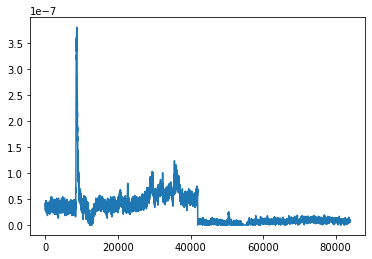

In [11]:
time=range(len(sheet3_x.iloc[0]))
plt.plot(time,sheet3_x.iloc[0,:])

In [9]:
sheet3_x.iloc[0]

0        3.191730e-08
1        2.935110e-08
2        3.191730e-08
3        3.191730e-08
4        3.704980e-08
             ...     
83909    8.313560e-09
83910    6.578560e-09
83911    7.735230e-09
83912    6.578560e-09
83913    7.156890e-09
Name: 0, Length: 83914, dtype: float64